In [10]:
import numpy as np
import pandas as pd
import re
import string
from sklearn import linear_model
from nltk.corpus import stopwords
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, recall_score


from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import set_config
set_config(display='diagram')

ENGLISH_STOP_WORDS = frozenset([
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves"])

# Netflix TV Shows and Movies Classfication: 
- colab: https://colab.research.google.com/drive/1PZ1VjwJ4ac1OlAhi9cCedJ8cMUoRiBJM#scrollTo=-uqjmrFEhktK

- ML goal: try using TVshow or Movie descirption (text data) to classify if it is TV show(postive)





# Netflix TV Shows and Movies Classfication: 


# Introduction

- Netflix, Inc. is a media services provider and production company headquarter in Los Gatos, California. Netflix was founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. The company’’s primary business is its subscription-based streaming service, which offers online streaming of a library of films and television series.

- This dataset consists of tv shows and movies available on Netflix as of 2021 (updated) The dataset is collected from Flixable which is a third-party Netflix search engine.



## Data
- show_id: id for show
- type: TV_show or Moive -> my target
- Rating
- release year
- data added
- director name
- description: description of the show



colab: https://colab.research.google.com/drive/1PZ1VjwJ4ac1OlAhi9cCedJ8cMUoRiBJM#scrollTo=-uqjmrFEhktK

ML goal: try using TVshow or Movie descirption (text data) to classify if it is TV show(postive)




## Import Data

In [15]:

dat = pd.read_csv("netflix_titles.csv")
X, y = list(dat.description), list(dat.type)
# pick descirption as features and type as label
# taget encoding type of show


In [7]:

def words(text):
    """
    Given a string return a list of words normalized as follows.
    Split the string to make words first by using regex compile() function.
    and string.punctuation + '0-9\\r\\t\\n' to replace all those.
    char with a space character.bayes
    Split on space to get word list.
    Ignore words < 3 char long.
    Lowercase all words.
    Remove English stop words.
    """
    ctrl_chars = '\x00-\x1f'
    regex = re.compile(r'[' + ctrl_chars + string.punctuation + '0-9\r\t\n]')
    nopunct = regex.sub(" ", text)  # delete stuff but leave at least a space to avoid clumping together
    words = nopunct.split(" ")
    words = [w for w in words if len(w) > 2]  # ignore a, an, to, at, be, ...
    words = [w.lower() for w in words]
    words = [w.lower() for w in words if w not in ENGLISH_STOP_WORDS]
    words = " ".join(words)
    # return list of words.
    return words



In [28]:

dat = pd.read_csv("netflix_titles.csv")
X, y = list(dat.description), list(dat.type) # tv show-> 1 Movies-> 0
# pick descirption as features and type as label

X = [words(i) for i in X] # text preprocessing on text data
# taget encoding type of show
y = preprocessing.LabelEncoder().fit_transform(list(dat.type))
# train-test split-> train:0.8, test=0.2 
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=123)


## sklearn pipline

In [43]:

# create a pipepline
pipe = Pipeline([
    ("tfidf_vectoriszer", TfidfVectorizer(analyzer='word',stop_words= "english")), # transform it to a matrix of TF-IDF features.    
    # ('chi2score',SelectKBest(chi2,k=2000)), # select top 2000 features based on chi2 test
    # ("tfidf_vectoriszer", TfidfVectorizer(analyzer='word',stop_words= "english")), # transform it to a matrix of TF-IDF features.
    ("classifier", RandomForestClassifier())
])

# Create dictionary with candidate learning algorithms and their hyperparameters
search_space = [
                {"classifier": [LogisticRegression()],# set logitis regression
                 "classifier__penalty": ['l2', "l1"], # set penalization coef
                 "classifier__C": np.logspace(0, 4, 10),
                 "classifier__solver":['newton-cg','saga','sag','liblinear'] ##This solvers don't allow L1 penalty
                 },
                {"classifier": [RandomForestClassifier()], # set rf
                 "classifier__n_estimators": [10, 100, 200], # num tree
                 "classifier__max_depth":[5,8,15,25,30,None], # tree max depth
                 "classifier__min_samples_leaf":[1,2,5,10,15,100], # min sample in leafnode
                 "classifier__max_leaf_nodes": [2, 5,10], # max sample in leafnode
                 }
]

# create a gridsearch of the pipeline, the fit the best model
gridsearch = GridSearchCV(pipe, search_space, cv=5, verbose=0,n_jobs=-1) # Fit grid search
best_model = gridsearch.fit(X_train, y_train)

## Model Evaluation

In [39]:
best_model.best_estimator_

Pipeline(steps=[('tfidf_vectoriszer', TfidfVectorizer(stop_words='english')),
                ('chi2score',
                 SelectKBest(k=2000,
                             score_func=<function chi2 at 0x7fe050ca38b0>)),
                ('classifier',
                 LogisticRegression(C=7.742636826811269, solver='saga'))])

To my surprise, logitstic regression is the winner

In [44]:
# best hyperparameters
best_model.best_params_

{'classifier': LogisticRegression(C=2.7825594022071245, solver='newton-cg'),
 'classifier__C': 2.7825594022071245,
 'classifier__penalty': 'l2',
 'classifier__solver': 'newton-cg'}

In [45]:

y_pred = best_model.predict(X_test)

## Model Evaluation

- as we can see recall is not good there're too many false negative

In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))


print(classification_report(y_test, y_pred), "\n")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7445442875481386
Precision: 0.7041666666666667
Recall: 0.3407258064516129
              precision    recall  f1-score   support

           0       0.75      0.93      0.83      1062
           1       0.70      0.34      0.46       496

    accuracy                           0.74      1558
   macro avg       0.73      0.64      0.65      1558
weighted avg       0.74      0.74      0.71      1558
 

[[991  71]
 [327 169]]


Text(0.5, 1.0, '2-class Precision-Recall curve:')

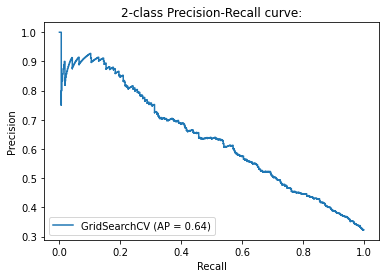

In [49]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(best_model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve:')

## Conclusion

- In Conclusion, for this poject I tried to sklearn pipeline to prepricess text and train a different bunch of parallelly
I used tidf to vectorize the text data and then feed the tfidf features into models

- Recall score looks aweful and there're too many False negative sample in this logitic model
- next step: using word2vec so that the model could able to capture the sematic meaning
